Assignment
----------

create an algorithm to sample from the normal distribution

$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\!\Bigl(-\frac{(x-\mu)^2}{2\sigma^2}\Bigr)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn

print(np,plt, scipy, seaborn)

<module 'numpy' from 'C:\\Users\\Administrator\\scoop\\apps\\miniconda3\\current\\Lib\\site-packages\\numpy\\__init__.py'> <module 'matplotlib.pyplot' from 'C:\\Users\\Administrator\\scoop\\apps\\miniconda3\\current\\Lib\\site-packages\\matplotlib\\pyplot.py'> <module 'scipy' from 'C:\\Users\\Administrator\\scoop\\apps\\miniconda3\\current\\Lib\\site-packages\\scipy\\__init__.py'> <module 'seaborn' from 'C:\\Users\\Administrator\\scoop\\apps\\miniconda3\\current\\Lib\\site-packages\\seaborn\\__init__.py'>


In [2]:
mu = 7.0
x = np.linspace(mu-5,mu+5,100)
sigma = 2.0

In [3]:
def f(x,mu,sigma):
    sigmasq = sigma**2.0
    constant = 1/np.sqrt(2*np.pi*sigmasq)
    distance = x - mu
    return constant * np.exp(-(distance**2) / (2*sigmasq))
p_x = f(x,mu,sigma)

In [4]:
def g(x):
    return f(x,mu,sigma)

acc=0
for curr in [2,4,6,8,10,12]:
    acc = acc+g(curr)
    print(curr,g(curr),acc)

2 0.00876415024678427 0.00876415024678427
4 0.06475879783294587 0.07352294807973014
6 0.17603266338214976 0.2495556114618799
8 0.17603266338214976 0.42558827484402967
10 0.06475879783294587 0.4903470726769755
12 0.00876415024678427 0.4991112229237598


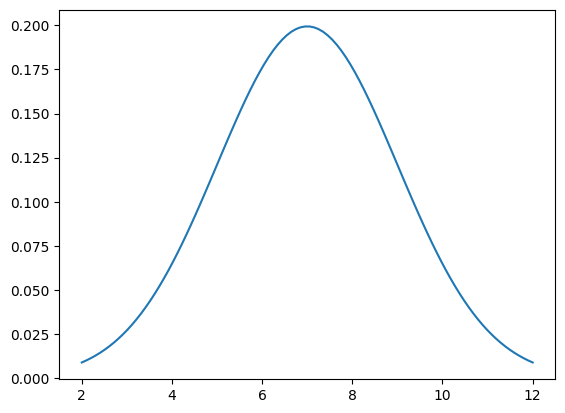

In [5]:
plt.plot(x,p_x)

A few definitions that we don't need to explore as we would get out of scope:
$$
\mathrm{erf}(x) 
= \frac{2}{\sqrt{\pi}} 
  \int_{0}^{x} 
  e^{-t^2}\, dt.
$$

The cumulative density function of the Normal distribution is:
$$
F_X(x)
= \frac12
  \Bigl[
    1 + \mathrm{erf}\!\Bigl(
      \frac{x - \mu}{\sigma \sqrt{2}}
    \Bigr)
  \Bigr].
$$

$$
\text{where } X \sim \mathcal{N}(\mu, \sigma^2).
$$

In [6]:
def F(x,mu,sigma):
    distance = x - mu
    return 0.5 * (1+ scipy.special.erf(distance/(sigma*np.sqrt(2))))
p_F_x = F(x,mu,sigma)

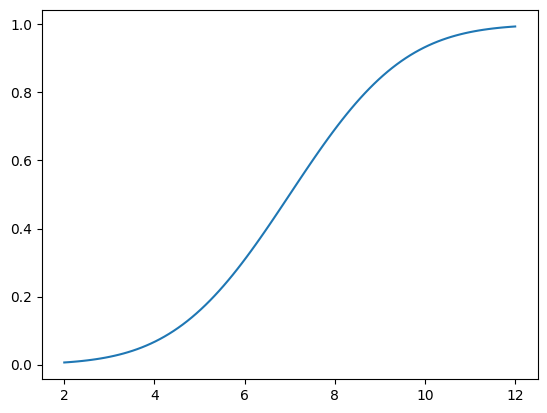

In [7]:
plt.plot(x,p_F_x)

**Step 1:**  
$$
F_X(x) \;=\; \tfrac{1}{2}\,\Bigl[\,1 \;+\;\mathrm{erf}\!\Bigl(\tfrac{x-\mu}{\sigma\,\sqrt{2}}\Bigr)\Bigr].
$$

**Step 2:**  
Let  
$$
p \;=\; F_X(x).
$$  
Then  
$$
p 
\;=\; 
\tfrac{1}{2}\,\Bigl[\,1 \;+\;\mathrm{erf}\!\Bigl(\tfrac{x-\mu}{\sigma\,\sqrt{2}}\Bigr)\Bigr].
$$

**Step 3:**  
$$
2p \;-\; 1
\;=\;
\mathrm{erf}\!\Bigl(\tfrac{x-\mu}{\sigma\,\sqrt{2}}\Bigr).
$$

**Step 4:**  
$$
\mathrm{erf}^{-1}(2p \;-\; 1)
\;=\;
\tfrac{x-\mu}{\sigma\,\sqrt{2}}.
$$

**Step 5:**  
$$
x
\;=\;
\mu
\;+\;
\sigma\,\sqrt{2}\,\mathrm{erf}^{-1}(\,2p - 1\,).
$$

Hence, the inverse CDF (quantile function) is  
$$
F_X^{-1}(p)
\;=\;
\mu
\;+\;
\sigma\,\sqrt{2}\,\mathrm{erf}^{-1}(\,2p - 1\,).
$$

In [8]:
p_linspace = np.linspace(0,1,100)
def F_inv(p, mu, sigma):
    return mu + sigma * np.sqrt(2) * scipy.special.erfinv(2 * p - 1)

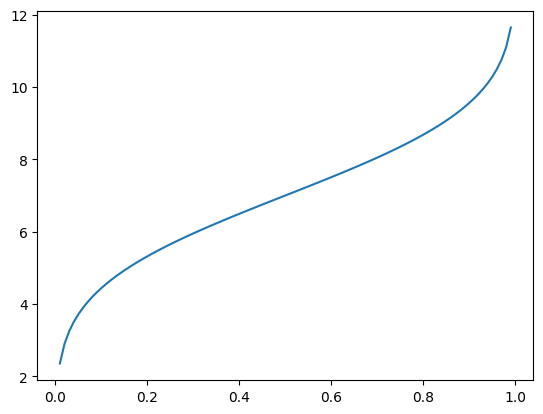

In [9]:
plt.plot(p_linspace, F_inv(p_linspace, mu, sigma))

In [10]:
sample_size = 10
def do_samples(sample_size, mu, sigma):
    p_samples = np.random.uniform(0,1,sample_size)
    x_samples = F_inv(p_samples, mu, sigma)
    return x_samples
x_samples = do_samples(sample_size, mu, sigma)
print(x_samples)

[ 6.80729944  4.35527796  6.41789196 10.20058078  8.08538002  8.92744195
  7.57279766  6.92106248  4.51880618  8.52699954]


[4.35527796 4.45527796 4.55527796 4.65527796 4.75527796 4.85527796
 4.95527796 5.05527796 5.15527796 5.25527796]


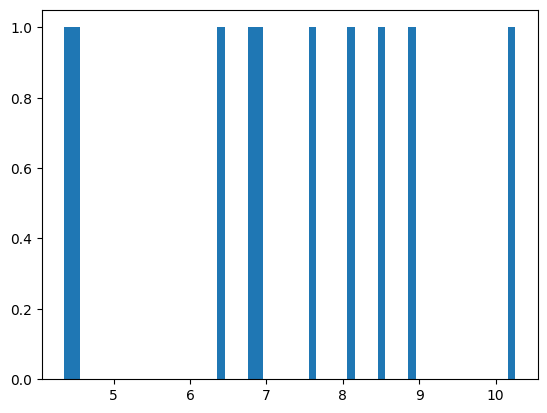

In [11]:
def plot_hist(x_samples, bin_width=0.1):
    bins = np.arange(x_samples.min(), x_samples.max()+bin_width, bin_width)
    print(bins[0:10])
    _ = plt.hist(x_samples, bins=bins)
plot_hist(x_samples)

In [12]:
empirical_mu = np.mean(x_samples)
empirical_sigma = np.std(x_samples)
print(empirical_mu, empirical_sigma)

7.233353796894147 1.754570496278694


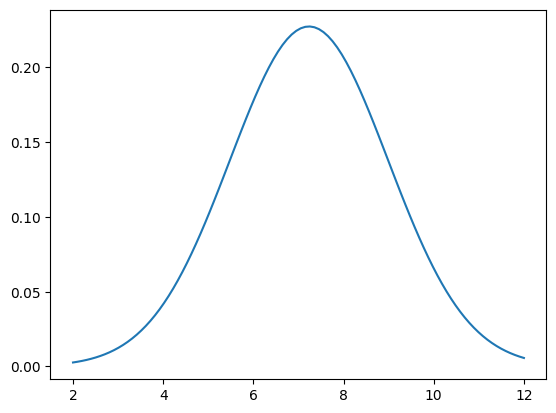

In [13]:
empirical_p_x = f(x, empirical_mu, empirical_sigma)
plt.plot(x,empirical_p_x)


2.61865978116471 0.20701683730498566
8.306537004194439 1.3440826268587176
7.5774007036962985 0.7777865469088088
6.2234860331882995 0.7762046347402349
8.022861391329842 2.036302034162581
9.378711679177782 1.244314022684902
9.423506245410303 0.3098161607798442
6.97486807177024 1.8619436677571173
5.768683530780324 0.7408655427040332
8.244994176925118 2.266516294192417


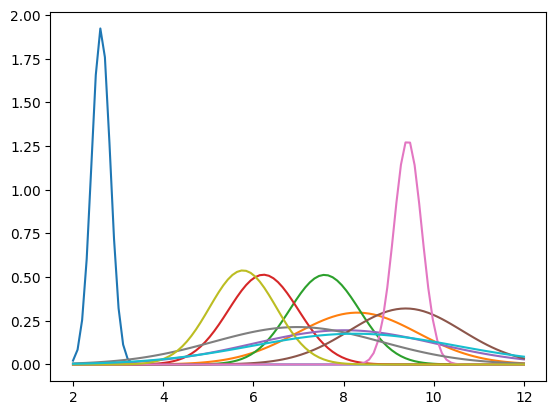

In [14]:
n_it = 10
sample_size = 2
for i in range(n_it):
    x_samples = do_samples(sample_size, mu, sigma)
    empirical_mu = np.mean(x_samples)
    empirical_sigma = np.std(x_samples)
    print(empirical_mu, empirical_sigma)
    empirical_p_x = f(x, empirical_mu, empirical_sigma)
    plt.plot(x,empirical_p_x)
plt.show()


In [15]:
# Experiment 1: Bias and Variance of Sample Mean Estimator
# We'll generate many sample sets of different sizes and plot the distribution of sample means

import seaborn as sns
from scipy import stats

# True parameters
true_mu = 7.0
true_sigma = 2.0

# Sample sizes to try
sample_sizes = [2, 5, 10, 30, 100]

# Number of experiments for each sample size
n_experiments = 1000

# Store results
results = []

# Run experiments
for size in sample_sizes:
    # Generate n_experiments sets of samples, each of size 'size'
    sample_means = []
    for _ in range(n_experiments):
        samples = do_samples(size, true_mu, true_sigma)
        sample_means.append(np.mean(samples))
    
    # Calculate statistics
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)
    
    # Bias = E[estimator] - true_value
    bias = mean_of_means - true_mu
    
    # Store results
    results.append({
        'sample_size': size,
        'mean_of_means': mean_of_means,
        'std_of_means': std_of_means,
        'bias': bias,
        'variance': std_of_means**2,
        'sample_means': sample_means
    })
    
    print(f"Sample Size: {size}")
    print(f"Mean of Sample Means: {mean_of_means:.4f}")
    print(f"Standard Deviation of Sample Means: {std_of_means:.4f}")
    print(f"Bias: {bias:.4f}")
    print(f"Variance: {std_of_means**2:.4f}")
    print("---")

Sample Size: 2
Mean of Sample Means: 7.0615
Standard Deviation of Sample Means: 1.4057
Bias: 0.0615
Variance: 1.9759
---
Sample Size: 5
Mean of Sample Means: 6.9976
Standard Deviation of Sample Means: 0.8857
Bias: -0.0024
Variance: 0.7844
---
Sample Size: 10
Mean of Sample Means: 6.9950
Standard Deviation of Sample Means: 0.6524
Bias: -0.0050
Variance: 0.4256
---
Sample Size: 30
Mean of Sample Means: 6.9966
Standard Deviation of Sample Means: 0.3669
Bias: -0.0034
Variance: 0.1346
---
Sample Size: 100
Mean of Sample Means: 6.9937
Standard Deviation of Sample Means: 0.1922
Bias: -0.0063
Variance: 0.0369
---


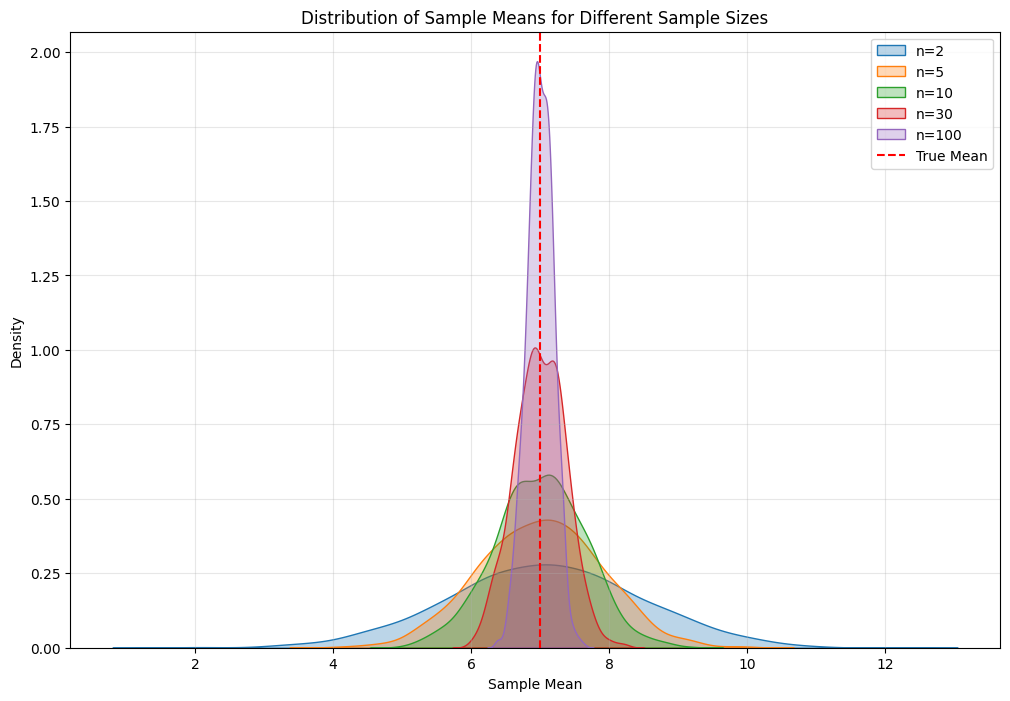

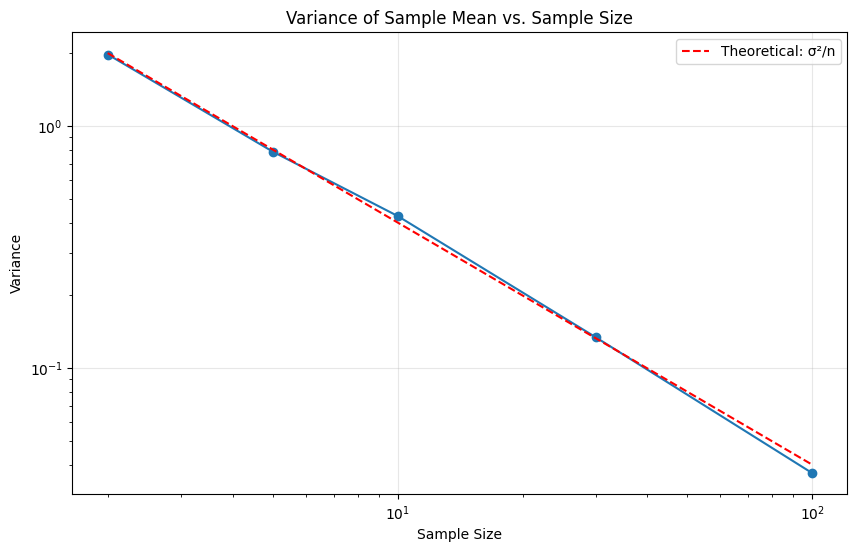

In [16]:
# Visualize the distributions of sample means
plt.figure(figsize=(12, 8))

for i, result in enumerate(results):
    # Use kernel density estimation for smoother visualization
    sns.kdeplot(
        result['sample_means'], 
        label=f"n={result['sample_size']}", 
        fill=True, 
        alpha=0.3
    )

# Add a vertical line for the true mean
plt.axvline(x=true_mu, color='red', linestyle='--', label='True Mean')

plt.title('Distribution of Sample Means for Different Sample Sizes')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualize how variance decreases with sample size
plt.figure(figsize=(10, 6))
plt.plot([r['sample_size'] for r in results], [r['variance'] for r in results], 'o-')
plt.title('Variance of Sample Mean vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Variance')
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')

# Add the theoretical variance = σ²/n
sample_sizes_theoretical = np.logspace(0.3, 2, 100)
theoretical_variance = true_sigma**2 / sample_sizes_theoretical
plt.plot(sample_sizes_theoretical, theoretical_variance, 'r--', label='Theoretical: σ²/n')
plt.legend()
plt.show()

## Sample Variance: Biased vs. Unbiased Estimators

For the variance of a Gaussian, there are two common estimators:

1. **Biased Estimator**: $\hat{\sigma}^2_{\text{biased}} = \frac{1}{n} \sum_{i=1}^n (X_i - \hat{\mu})^2$

2. **Unbiased Estimator**: $\hat{\sigma}^2_{\text{unbiased}} = \frac{1}{n-1} \sum_{i=1}^n (X_i - \hat{\mu})^2$

The biased estimator is the maximum likelihood estimator, but it systematically underestimates the true variance. The unbiased estimator corrects for this by using n-1 in the denominator.

In [17]:
# Experiment 2: Comparing Biased and Unbiased Variance Estimators
# We'll generate samples and compare both variance estimators

# Sample sizes to try
sample_sizes = [2, 3, 5, 10, 30, 100]

# Number of experiments for each sample size
n_experiments = 1000

# Store results
variance_results = []

# Run experiments
for size in sample_sizes:
    biased_estimates = []
    unbiased_estimates = []
    
    for _ in range(n_experiments):
        samples = do_samples(size, true_mu, true_sigma)
        
        # Calculate variance estimators
        # Biased (MLE): 1/n
        biased_var = np.var(samples, ddof=0)  # ddof=0 uses divisor n
        
        # Unbiased: 1/(n-1)
        unbiased_var = np.var(samples, ddof=1)  # ddof=1 uses divisor n-1
        
        biased_estimates.append(biased_var)
        unbiased_estimates.append(unbiased_var)
    
    # Calculate statistics
    mean_biased = np.mean(biased_estimates)
    mean_unbiased = np.mean(unbiased_estimates)
    
    # Bias = E[estimator] - true_value
    bias_biased = mean_biased - true_sigma**2
    bias_unbiased = mean_unbiased - true_sigma**2
    
    # Variance of estimators
    var_biased = np.var(biased_estimates)
    var_unbiased = np.var(unbiased_estimates)
    
    # Store results
    variance_results.append({
        'sample_size': size,
        'mean_biased': mean_biased,
        'mean_unbiased': mean_unbiased,
        'bias_biased': bias_biased,
        'bias_unbiased': bias_unbiased,
        'var_biased': var_biased,
        'var_unbiased': var_unbiased,
        'biased_estimates': biased_estimates,
        'unbiased_estimates': unbiased_estimates
    })
    
    print(f"Sample Size: {size}")
    print(f"Mean of Biased Estimator: {mean_biased:.4f}, Bias: {bias_biased:.4f}")
    print(f"Mean of Unbiased Estimator: {mean_unbiased:.4f}, Bias: {bias_unbiased:.4f}")
    print(f"Variance of Biased Estimator: {var_biased:.4f}")
    print(f"Variance of Unbiased Estimator: {var_unbiased:.4f}")
    print("---")

Sample Size: 2
Mean of Biased Estimator: 2.0833, Bias: -1.9167
Mean of Unbiased Estimator: 4.1665, Bias: 0.1665
Variance of Biased Estimator: 8.8016
Variance of Unbiased Estimator: 35.2064
---
Sample Size: 3
Mean of Biased Estimator: 2.8299, Bias: -1.1701
Mean of Unbiased Estimator: 4.2449, Bias: 0.2449
Variance of Biased Estimator: 8.4992
Variance of Unbiased Estimator: 19.1233
---
Sample Size: 5
Mean of Biased Estimator: 3.2572, Bias: -0.7428
Mean of Unbiased Estimator: 4.0716, Bias: 0.0716
Variance of Biased Estimator: 5.3837
Variance of Unbiased Estimator: 8.4120
---
Sample Size: 10
Mean of Biased Estimator: 3.6877, Bias: -0.3123
Mean of Unbiased Estimator: 4.0974, Bias: 0.0974
Variance of Biased Estimator: 3.0675
Variance of Unbiased Estimator: 3.7870
---
Sample Size: 30
Mean of Biased Estimator: 3.9536, Bias: -0.0464
Mean of Unbiased Estimator: 4.0900, Bias: 0.0900
Variance of Biased Estimator: 1.0439
Variance of Unbiased Estimator: 1.1171
---
Sample Size: 100
Mean of Biased Esti

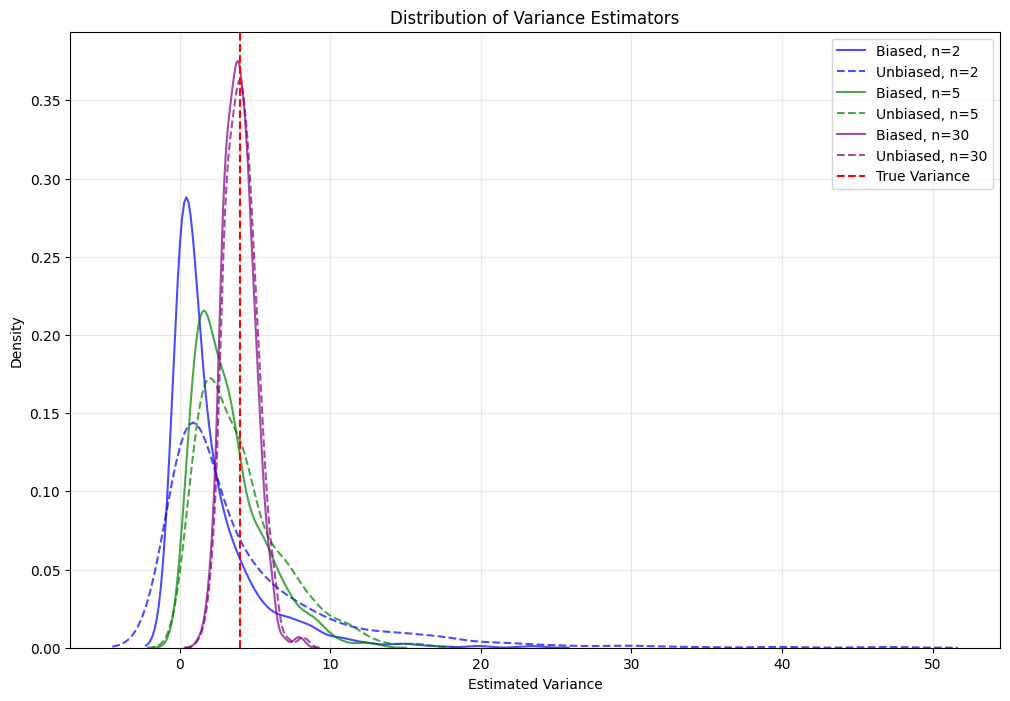

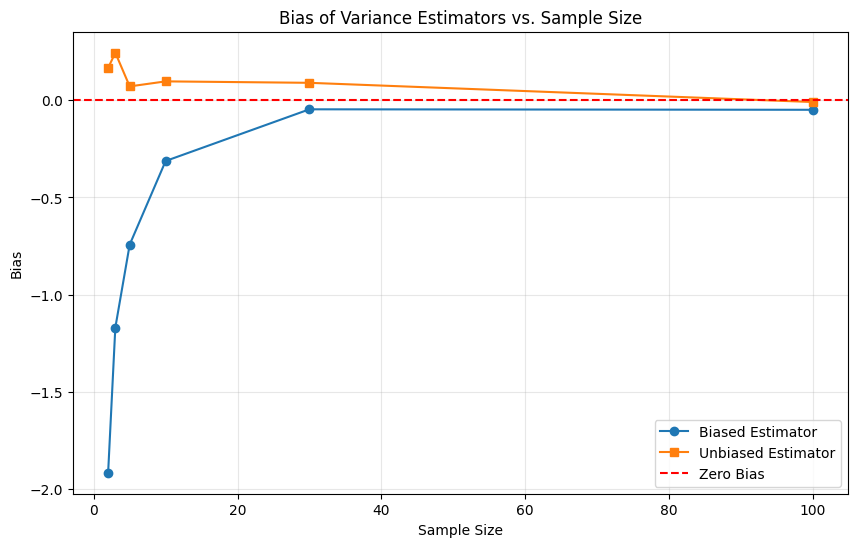

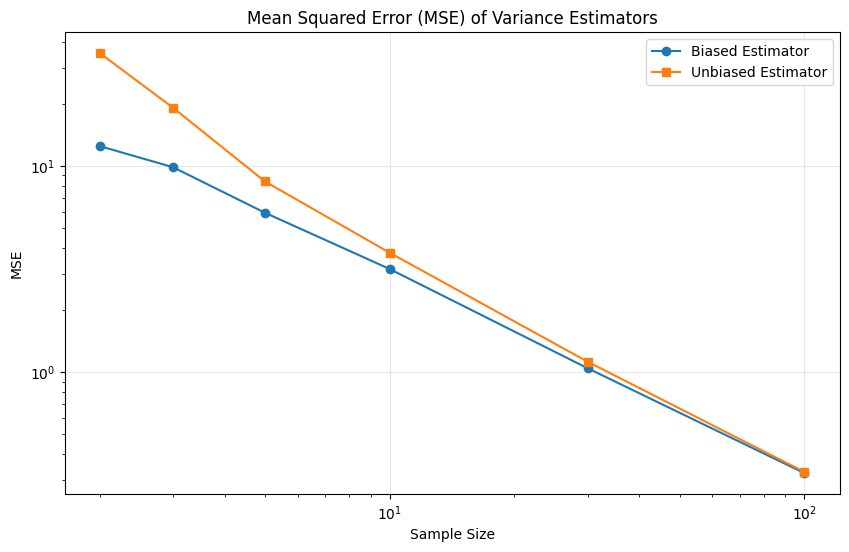

In [18]:
# Visualize the distributions of variance estimators
plt.figure(figsize=(12, 8))

# Plot for a few sample sizes
sizes_to_plot = [2, 5, 30]
colors = ['blue', 'green', 'purple']

for i, size in enumerate(sizes_to_plot):
    idx = sample_sizes.index(size)
    result = variance_results[idx]
    
    # Biased estimator
    sns.kdeplot(
        result['biased_estimates'], 
        label=f"Biased, n={size}", 
        color=colors[i],
        linestyle='-',
        alpha=0.7
    )
    
    # Unbiased estimator
    sns.kdeplot(
        result['unbiased_estimates'], 
        label=f"Unbiased, n={size}", 
        color=colors[i],
        linestyle='--',
        alpha=0.7
    )

# Add a vertical line for the true variance
plt.axvline(x=true_sigma**2, color='red', linestyle='--', label='True Variance')

plt.title('Distribution of Variance Estimators')
plt.xlabel('Estimated Variance')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualize bias of both estimators vs. sample size
plt.figure(figsize=(10, 6))
plt.plot([r['sample_size'] for r in variance_results], 
         [r['bias_biased'] for r in variance_results], 'o-', 
         label='Biased Estimator')
plt.plot([r['sample_size'] for r in variance_results], 
         [r['bias_unbiased'] for r in variance_results], 's-', 
         label='Unbiased Estimator')

plt.axhline(y=0, color='r', linestyle='--', label='Zero Bias')
plt.title('Bias of Variance Estimators vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Bias')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Calculate and plot MSE for both estimators
plt.figure(figsize=(10, 6))
mse_biased = [r['bias_biased']**2 + r['var_biased'] for r in variance_results]
mse_unbiased = [r['bias_unbiased']**2 + r['var_unbiased'] for r in variance_results]

plt.plot([r['sample_size'] for r in variance_results], mse_biased, 'o-', label='Biased Estimator')
plt.plot([r['sample_size'] for r in variance_results], mse_unbiased, 's-', label='Unbiased Estimator')

plt.title('Mean Squared Error (MSE) of Variance Estimators')
plt.xlabel('Sample Size')
plt.ylabel('MSE')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

## Bias-Variance Tradeoff in Mean Estimation

The bias-variance tradeoff is a fundamental concept in statistics and machine learning. The mean squared error (MSE) of an estimator can be decomposed into:

$$\text{MSE}(\hat{\theta}) = \text{Bias}(\hat{\theta})^2 + \text{Var}(\hat{\theta})$$

In our experiments we observed several key points:

1. **Sample Mean Estimator**: 
   - Is unbiased: $\mathbb{E}[\hat{\mu}] = \mu$
   - Has variance that decreases with sample size: $\text{Var}(\hat{\mu}) = \frac{\sigma^2}{n}$

2. **Sample Variance Estimators**:
   - The MLE estimator ($\frac{1}{n}$ divisor) is biased but has lower variance
   - The unbiased estimator ($\frac{1}{n-1}$ divisor) has zero bias but higher variance
   - For small sample sizes, the bias-variance tradeoff can result in the biased estimator having lower MSE
   - As sample size increases, both estimators converge

The bias-variance tradeoff is a key concept in model complexity. More complex models can reduce bias but tend to have higher variance (overfitting), while simpler models may have higher bias but lower variance (underfitting).

In [19]:
# Experiment 3: Demonstrating the Bias-Variance Tradeoff with Shrinkage Estimators
# We'll create a shrinkage estimator for the mean that trades bias for reduced variance

# Function to compute shrinkage estimator
def shrinkage_estimator(samples, alpha, target=0.0):
    """
    Computes a shrinkage estimator that is a weighted average of the sample mean and a target value.
    
    Parameters:
    - samples: array of data points
    - alpha: shrinkage parameter between 0 and 1
    - target: the value toward which we shrink (default 0)
    
    Returns:
    - The shrinkage estimate
    """
    sample_mean = np.mean(samples)
    return (1 - alpha) * sample_mean + alpha * target

# Sample size for this experiment
n = 5

# Shrinkage parameters to try
alphas = [0, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.0]

# Number of experiments
n_experiments = 5000

# Store results
shrinkage_results = []

# Run experiments
for alpha in alphas:
    estimates = []
    for _ in range(n_experiments):
        samples = do_samples(n, true_mu, true_sigma)
        estimate = shrinkage_estimator(samples, alpha)
        estimates.append(estimate)
    
    # Calculate statistics
    mean_estimate = np.mean(estimates)
    var_estimate = np.var(estimates)
    bias = mean_estimate - true_mu
    mse = bias**2 + var_estimate
    
    shrinkage_results.append({
        'alpha': alpha,
        'mean': mean_estimate,
        'variance': var_estimate,
        'bias': bias,
        'bias_squared': bias**2,
        'mse': mse,
        'estimates': estimates
    })
    
    print(f"Alpha: {alpha:.1f}")
    print(f"Mean: {mean_estimate:.4f}")
    print(f"Bias: {bias:.4f}")
    print(f"Variance: {var_estimate:.4f}")
    print(f"MSE: {mse:.4f}")
    print("---")

Alpha: 0.0
Mean: 6.9964
Bias: -0.0036
Variance: 0.8288
MSE: 0.8288
---
Alpha: 0.1
Mean: 6.3089
Bias: -0.6911
Variance: 0.6464
MSE: 1.1239
---
Alpha: 0.2
Mean: 5.6164
Bias: -1.3836
Variance: 0.5096
MSE: 2.4239
---
Alpha: 0.3
Mean: 4.9016
Bias: -2.0984
Variance: 0.3984
MSE: 4.8015
---
Alpha: 0.5
Mean: 3.5093
Bias: -3.4907
Variance: 0.1974
MSE: 12.3826
---
Alpha: 0.7
Mean: 2.0997
Bias: -4.9003
Variance: 0.0692
MSE: 24.0823
---
Alpha: 0.9
Mean: 0.6994
Bias: -6.3006
Variance: 0.0078
MSE: 39.7051
---
Alpha: 1.0
Mean: 0.0000
Bias: -7.0000
Variance: 0.0000
MSE: 49.0000
---


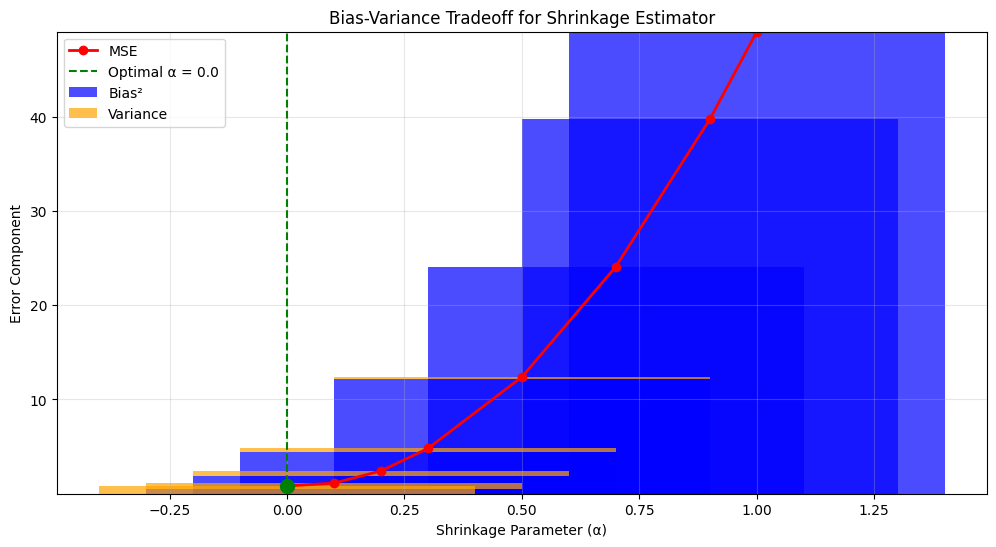

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21772\3031235435.py:42: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


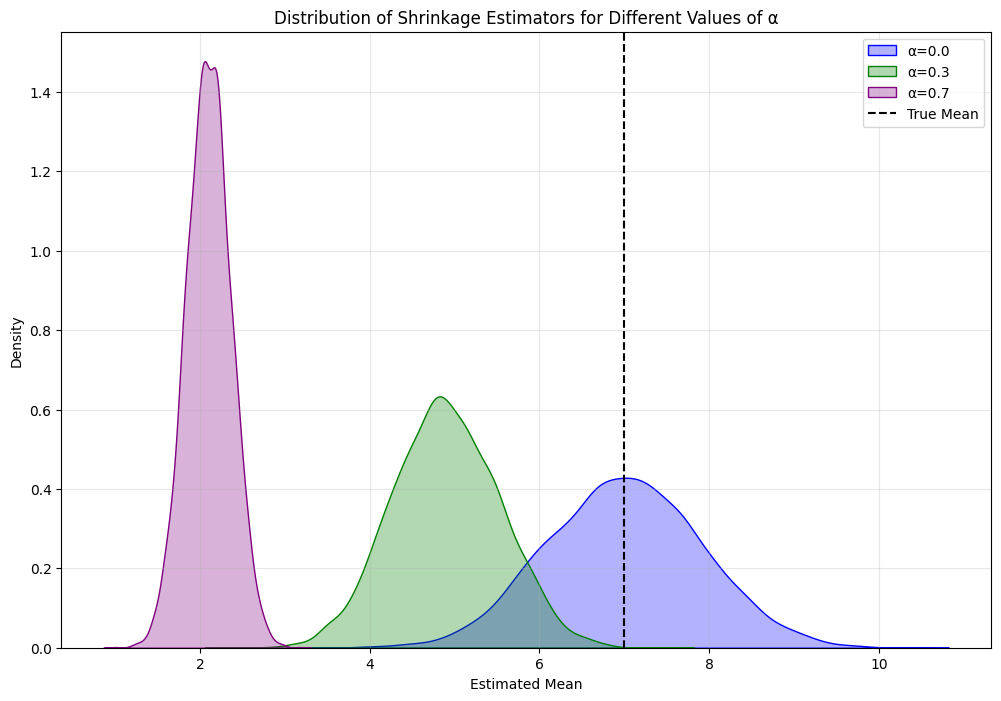

In [20]:
# Visualize the bias-variance decomposition for shrinkage estimators
plt.figure(figsize=(12, 6))

# Extract data
alphas = [r['alpha'] for r in shrinkage_results]
biases_sq = [r['bias_squared'] for r in shrinkage_results]
variances = [r['variance'] for r in shrinkage_results]
mses = [r['mse'] for r in shrinkage_results]

# Plotting each component
plt.bar(alphas, biases_sq, label='Bias²', alpha=0.7, color='blue')
plt.bar(alphas, variances, bottom=biases_sq, label='Variance', alpha=0.7, color='orange')
plt.plot(alphas, mses, 'ro-', label='MSE', linewidth=2)

# Find the alpha with minimum MSE
min_mse_idx = np.argmin(mses)
min_alpha = alphas[min_mse_idx]
min_mse = mses[min_mse_idx]

plt.axvline(x=min_alpha, color='green', linestyle='--', 
            label=f'Optimal α = {min_alpha:.1f}')
plt.scatter([min_alpha], [min_mse], color='green', s=100, zorder=5)

plt.title('Bias-Variance Tradeoff for Shrinkage Estimator')
plt.xlabel('Shrinkage Parameter (α)')
plt.ylabel('Error Component')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualize the distribution of estimators for different alphas
plt.figure(figsize=(12, 8))

# Select a few alphas to plot
alphas_to_plot = [0.0, 0.3, 0.7, 1.0]
colors = ['blue', 'green', 'purple', 'red']

for i, alpha in enumerate(alphas_to_plot):
    idx = alphas.index(alpha)
    result = shrinkage_results[idx]
    
    sns.kdeplot(
        result['estimates'], 
        label=f"α={alpha}", 
        color=colors[i],
        fill=True,
        alpha=0.3
    )

# Add a vertical line for the true mean
plt.axvline(x=true_mu, color='black', linestyle='--', label='True Mean')

plt.title('Distribution of Shrinkage Estimators for Different Values of α')
plt.xlabel('Estimated Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

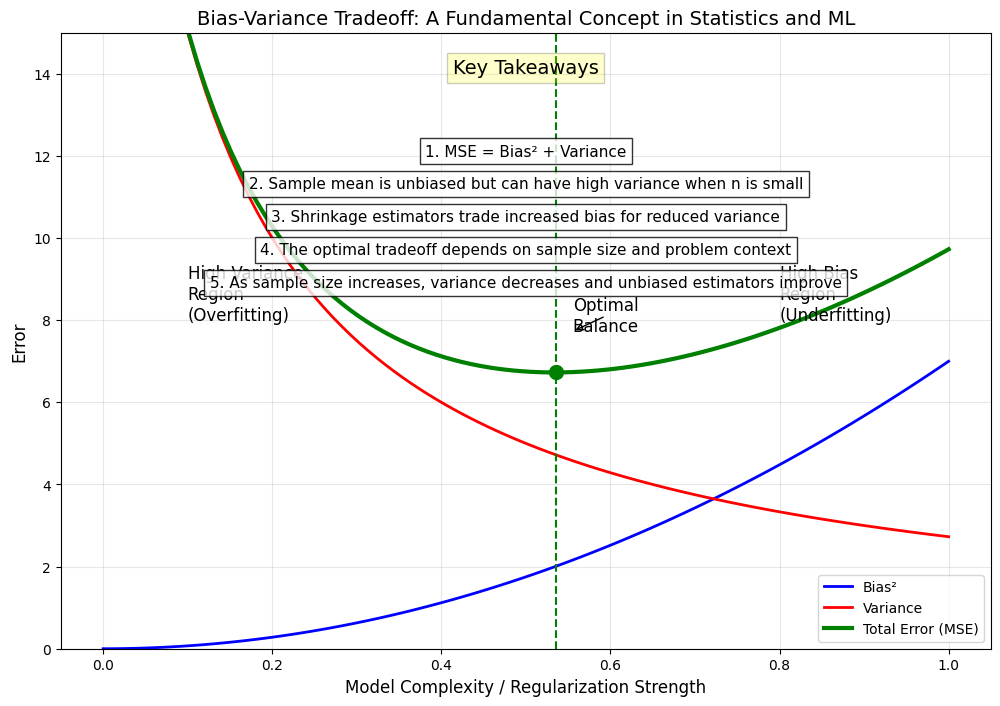

In [21]:
# Conclusion and Key Takeaways
import matplotlib.patches as mpatches

# Create a summary figure with key insights
plt.figure(figsize=(12, 8))

# 1. Draw the bias-variance tradeoff curve
x = np.linspace(0, 1, 100)
bias = x**2 * 7  # Simplified function for illustration
variance = 3/(x+0.1)  # Simplified function for illustration
total_error = bias + variance

plt.plot(x, bias, 'b-', linewidth=2, label='Bias²')
plt.plot(x, variance, 'r-', linewidth=2, label='Variance')
plt.plot(x, total_error, 'g-', linewidth=3, label='Total Error (MSE)')

# Mark the minimum point
min_idx = np.argmin(total_error)
min_x = x[min_idx]
min_y = total_error[min_idx]
plt.scatter([min_x], [min_y], color='green', s=100, zorder=5)
plt.axvline(x=min_x, color='green', linestyle='--')

# Label the regions
plt.annotate('High Variance\nRegion\n(Overfitting)', xy=(0.1, 8), fontsize=12)
plt.annotate('High Bias\nRegion\n(Underfitting)', xy=(0.8, 8), fontsize=12)
plt.annotate('Optimal\nBalance', xy=(min_x+0.02, min_y+1), fontsize=12,
             arrowprops=dict(arrowstyle='->'))

# Add key insights as text boxes
plt.text(0.5, 14, "Key Takeaways", 
         horizontalalignment='center',
         bbox=dict(facecolor='yellow', alpha=0.2),
         fontsize=14)

insights = [
    "1. MSE = Bias² + Variance",
    "2. Sample mean is unbiased but can have high variance when n is small",
    "3. Shrinkage estimators trade increased bias for reduced variance",
    "4. The optimal tradeoff depends on sample size and problem context",
    "5. As sample size increases, variance decreases and unbiased estimators improve"
]

ypos = 12
for insight in insights:
    plt.text(0.5, ypos, insight, fontsize=11, 
             horizontalalignment='center',
             bbox=dict(facecolor='white', alpha=0.8))
    ypos -= 0.8

plt.title('Bias-Variance Tradeoff: A Fundamental Concept in Statistics and ML', fontsize=14)
plt.xlabel('Model Complexity / Regularization Strength', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.ylim(0, 15)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

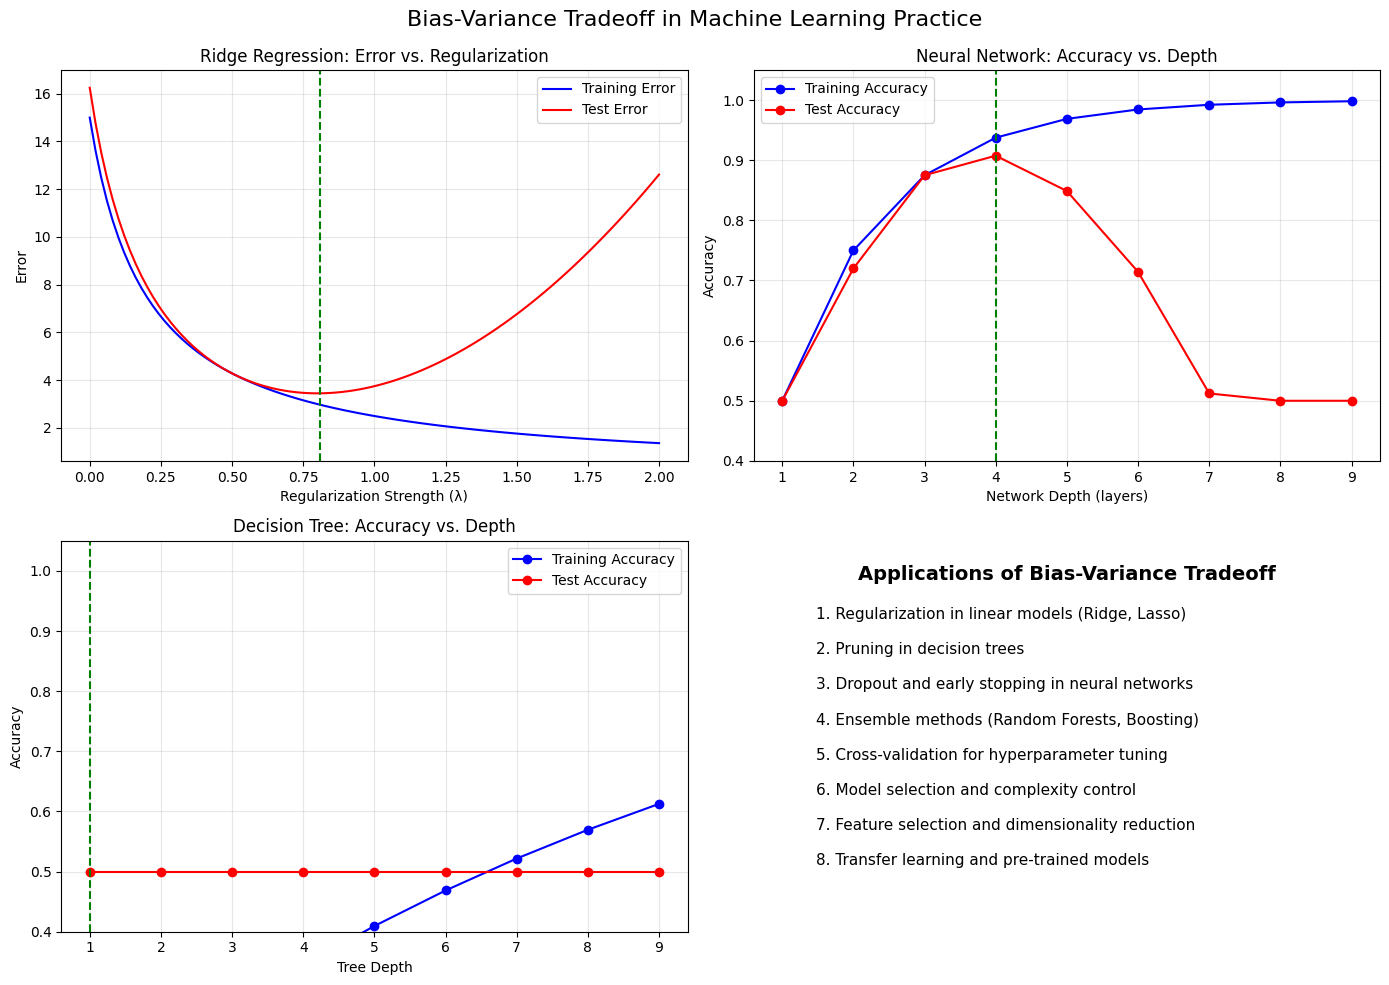

In [22]:
# Applications of the Bias-Variance Tradeoff in Machine Learning

# Example parameters for illustration
lambdas = np.linspace(0, 2, 100)  # Regularization strength
train_errors = 3/(lambdas+0.2)  # Training error
test_errors = 3/(lambdas+0.2) + 5*((lambdas-0.5)**2)  # Test error

# Create comparison visualization
plt.figure(figsize=(14, 10))

# Create subplots
plt.subplot(2, 2, 1)
plt.plot(lambdas, train_errors, 'b-', label='Training Error')
plt.plot(lambdas, test_errors, 'r-', label='Test Error')
min_idx = np.argmin(test_errors)
plt.axvline(x=lambdas[min_idx], color='green', linestyle='--')
plt.title('Ridge Regression: Error vs. Regularization')
plt.xlabel('Regularization Strength (λ)')
plt.ylabel('Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Neural network depth vs error
plt.subplot(2, 2, 2)
nn_depths = np.arange(1, 10)
train_acc = 1 - 0.5**nn_depths  # Simplified function
test_acc = 1 - 0.5**nn_depths - 0.03*(nn_depths-3)**2
test_acc = np.maximum(0.5, test_acc)
plt.plot(nn_depths, train_acc, 'b-o', label='Training Accuracy')
plt.plot(nn_depths, test_acc, 'r-o', label='Test Accuracy')
best_depth = nn_depths[np.argmax(test_acc)]
plt.axvline(x=best_depth, color='green', linestyle='--')
plt.title('Neural Network: Accuracy vs. Depth')
plt.xlabel('Network Depth (layers)')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1.05)
plt.legend()
plt.grid(True, alpha=0.3)

# Decision tree depth vs error
plt.subplot(2, 2, 3)
tree_depths = np.arange(1, 10)
tree_train = 1 - 0.9**(tree_depths)  # Simplified function
tree_test = 1 - 0.9**(tree_depths) - 0.05*(tree_depths-2)**2
tree_test = np.maximum(0.5, tree_test)
plt.plot(tree_depths, tree_train, 'b-o', label='Training Accuracy')
plt.plot(tree_depths, tree_test, 'r-o', label='Test Accuracy')
best_depth = tree_depths[np.argmax(tree_test)]
plt.axvline(x=best_depth, color='green', linestyle='--')
plt.title('Decision Tree: Accuracy vs. Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1.05)
plt.legend()
plt.grid(True, alpha=0.3)

# Real-world applications
plt.subplot(2, 2, 4)
plt.axis('off')
applications = [
    "1. Regularization in linear models (Ridge, Lasso)",
    "2. Pruning in decision trees",
    "3. Dropout and early stopping in neural networks",
    "4. Ensemble methods (Random Forests, Boosting)",
    "5. Cross-validation for hyperparameter tuning",
    "6. Model selection and complexity control",
    "7. Feature selection and dimensionality reduction",
    "8. Transfer learning and pre-trained models"
]

plt.text(0.5, 0.9, "Applications of Bias-Variance Tradeoff", 
        fontsize=14, fontweight='bold', ha='center')

for i, app in enumerate(applications):
    plt.text(0.1, 0.8-i*0.09, app, fontsize=11)

plt.suptitle('Bias-Variance Tradeoff in Machine Learning Practice', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [23]:
# Exercises for Students

# Exercise 1: How does sample size affect the bias and variance of the sample mean?
# - Try modifying the experiment to use different true distributions
# - Plot how the MSE of the sample mean decreases with sample size
# - Compare with the theoretical rate of O(1/n)

# Exercise 2: Implement and compare different estimators for the standard deviation
# - The biased estimator: sqrt(sum((x - mean)²)/n)
# - The unbiased estimator: sqrt(sum((x - mean)²)/(n-1))
# - Compare their bias, variance, and MSE for different sample sizes

# Exercise 3: Explore different shrinkage targets for the mean estimator
# - Instead of shrinking toward 0, try other targets (e.g., population mean, prior information)
# - How does the optimal shrinkage parameter change with sample size?
# - Can you derive an analytical expression for the optimal alpha?

# Exercise 4: Implement a cross-validation procedure for selecting the optimal shrinkage parameter
# - Split your data into training and validation sets
# - Compute different shrinkage estimators on the training set
# - Evaluate their performance on the validation set
# - Select the best parameter and evaluate on a test set

# Exercise 5: Extend these concepts to linear regression
# - Generate data from a linear model with noise
# - Implement ridge regression with different regularization parameters
# - Visualize the bias-variance tradeoff in the regression setting
# - Find the optimal regularization parameter

print("Ready to explore the bias-variance tradeoff in depth!")

Ready to explore the bias-variance tradeoff in depth!
